### [목표]
- 년도별 서울시 인구 현황(내국인/외국인/고령자)
- 년도별 외국인 남/여 비율

In [47]:
# 구분자가 콤마(,)가 아닌 다른 구분자를 사용한 데이터 읽어오기
# 제목행 선택: header = 1(index 번호)
import pandas as pd

df1 = pd.read_csv('./Data/서울시 인구현황_구.txt', sep = '\t', header = 1)
df1.head(3)

,기간,자치구,세대,합계,합계.1,합계.2,한국인,한국인.1,한국인.2,등록외국인,등록외국인.1,등록외국인.2,인구밀도,인구밀도.1,세대당인구,65세이상고령자
0,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,인구밀도(명/㎢),면적(㎢),세대당인구,65세이상고령자
1,1991,합계,"3,330,317","10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,"18,014",605.33,3.27,…
2,1991,종로구,"78,169","236,806","119,127","117,679",…,…,…,…,…,…,"9,865",24.01,3.03,…


In [48]:
# 기간, 자치구, 전체인구/전체(남)/전체(여)/
# 내국인/내국인(남)/내국인(여)/외국인/외국인(남)/외국인(여)/65세이상

# df1['기간','자치구', '합계', '합계.1', '합계.2', '한국인', '한국인.1', '한국인.2','등록외국인', '등록외국인.1', '등록외국인.2','65세이상고령자']
# df1.loc[:, ['기간','자치구', '합계', '합계.1', '합계.2', '한국인', '한국인.1',
#            '한국인.2','등록외국인', '등록외국인.1', '등록외국인.2','65세이상고령자']]
df1 = df1.iloc[:, [0,1, 9 ,10, 11]]
df1

,기간,자치구,합계,합계.1,합계.2,한국인,한국인.1,한국인.2,등록외국인,등록외국인.1,등록외국인.2,65세이상고령자
0,기간,자치구,계,남자,여자,계,남자,여자,계,남자,여자,65세이상고령자
1,1991,합계,"10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,…
2,1991,종로구,"236,806","119,127","117,679",…,…,…,…,…,…,…
3,1991,중구,"184,142","93,312","90,830",…,…,…,…,…,…,…
4,1991,용산구,"294,341","147,914","146,427",…,…,…,…,…,…,…
...,...,...,...,...,...,...,...,...,...,...,...,...
764,2020,관악구,"509,803","255,211","254,592","495,060","248,339","246,721","14,743","6,872","7,871","78,875"
765,2020,서초구,"429,025","205,282","223,743","425,126","203,359","221,767","3,899","1,923","1,976","60,169"
766,2020,강남구,"544,055","260,378","283,677","539,231","257,999","281,232","4,824","2,379","2,445","75,096"
767,2020,송파구,"673,926","325,080","348,846","667,960","322,299","345,661","5,966","2,781","3,185","93,483"


In [39]:
df1.columns

Index(['기간', '자치구', '합계', '합계.1', '합계.2', '한국인', '한국인.1', '한국인.2', '등록외국인',
       '등록외국인.1', '등록외국인.2', '65세이상고령자'],
      dtype='object')

### ※ 참고사항 : axis = 0 vs axis = 1
- axis = 0은 DataFrame 에서 행 단위를 수정할 때 필요한 파라미터 값
- axis = 1은 DataFrame 에서 열 단위를 수정할 때 필요한 파라미터 값

In [49]:
df1.drop(0, axis = 0, inplace = True) #DataFrame.drop(0) axis = 0 이 생략된 상태

In [30]:
df1.head()

,기간,자치구,합계,합계.1,합계.2,한국인,한국인.1,한국인.2,등록외국인,등록외국인.1,등록외국인.2,65세이상고령자
1,1991,합계,"10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,…
2,1991,종로구,"236,806","119,127","117,679",…,…,…,…,…,…,…
3,1991,중구,"184,142","93,312","90,830",…,…,…,…,…,…,…
4,1991,용산구,"294,341","147,914","146,427",…,…,…,…,…,…,…
5,1991,성동구,"789,014","401,375","387,639",…,…,…,…,…,…,…


### 열 이름 변경
- DataFrame.rename(columns = {'합계' : '총인구'}, '합계.1':'총인구(남), ...'}) # 열이름 한두개 바꾸기
- DataFrame.rename(columns = {DataFrame.columns(2) : '총인구', DataFrame.columns(3)':'총인구(남), ...'}) #열 이름 다수 변경


In [50]:
df1 = df1.rename(columns = {'합계' : '총인구', '한국인' : '내국인', '등록외국인' : '외국인'})
df1.head(3)

,기간,자치구,총인구,합계.1,합계.2,내국인,한국인.1,한국인.2,외국인,등록외국인.1,등록외국인.2,65세이상고령자
1,1991,합계,"10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,…
2,1991,종로구,"236,806","119,127","117,679",…,…,…,…,…,…,…
3,1991,중구,"184,142","93,312","90,830",…,…,…,…,…,…,…


In [54]:
ccol_name=['년도', '자치구', '총인구', '총인구(남)', '총인구(여)', '내국인', '내국인(남)', '내국인(여)',
          '외국인', '외국인(남)','외국인(여)', '65세이상']

for i in range(len(col_name)):
    df1.rename(columns={df1.columns[i]:col_name[i]}, inplace=True)

df1.head(3)


,년도,자치구,총인구,총인구(남),총인구(여),내국인,내국인(남),내국인(여),외국인,외국인(남),외국인(여),65세이상
1,1991,합계,"10,904,527","5,485,353","5,419,174",…,…,…,…,…,…,…
2,1991,종로구,"236,806","119,127","117,679",…,…,…,…,…,…,…
3,1991,중구,"184,142","93,312","90,830",…,…,…,…,…,…,…


### 년도별 총인구(남)/총인구(여) 값을 나타내는 그래프 작성

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      768 non-null    object
 1   자치구     768 non-null    object
 2   총인구     768 non-null    object
 3   총인구(남)  768 non-null    object
 4   총인구(여)  768 non-null    object
 5   내국인     768 non-null    object
 6   내국인(남)  768 non-null    object
 7   내국인(여)  768 non-null    object
 8   외국인     768 non-null    object
 9   외국인(남)  768 non-null    object
 10  외국인(여)  768 non-null    object
 11  65세이상   768 non-null    object
dtypes: object(12)
memory usage: 78.0+ KB


In [69]:
df2 = df1.iloc[:, 0:5]
df2.head()

,년도,자치구,총인구,총인구(남),총인구(여)
1,1991,합계,10904527,"5,485,353","5,419,174"
2,1991,종로구,236806,"119,127","117,679"
3,1991,중구,184142,"93,312","90,830"
4,1991,용산구,294341,"147,914","146,427"
5,1991,성동구,789014,"401,375","387,639"


### DataFrame 데이터 타입 변경하는 방법
- pd.astype(dtype) # 모든 열의 데이터 타입 변경
- pd.astype({'컬럼명' : dtype}) # 특정 열의 데이터 타입 변경

In [73]:
# pandas에서 데이터 타입 변경
df2['총인구'] = df2['총인구'].str.replace(',','')
df2['총인구(남)'] = df2['총인구(남)'].str.replace(',','')
df2['총인구(여)'] = df2['총인구(여)'].str.replace(',','')
df2.dtypes

<ipython-input-73-c3e3327191a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['총인구'] = df2['총인구'].str.replace(',','')
<ipython-input-73-c3e3327191a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['총인구(남)'] = df2['총인구(남)'].str.replace(',','')
<ipython-input-73-c3e3327191a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

년도        object
자치구       object
총인구       object
총인구(남)    object
총인구(여)    object
dtype: object

In [77]:
df2 = df2.astype({'년도': int, '총인구' : int,'총인구(남)' : int,'총인구(여)' : int})
df2.dtypes

년도         int32
자치구       object
총인구        int32
총인구(남)     int32
총인구(여)     int32
dtype: object

In [78]:
df2.head()

,년도,자치구,총인구,총인구(남),총인구(여)
1,1991,합계,10904527,5485353,5419174
2,1991,종로구,236806,119127,117679
3,1991,중구,184142,93312,90830
4,1991,용산구,294341,147914,146427
5,1991,성동구,789014,401375,387639


조회할 구 이름을 입력하세요합계


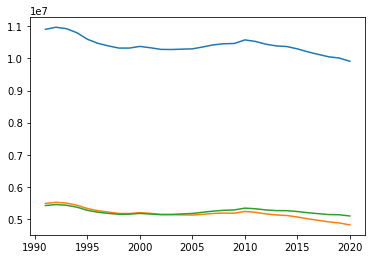

In [84]:
# 그래프 한번에 보기
import matplotlib.pyplot as plt

gu = input('조회할 구 이름을 입력하세요')

df3 = df2[df2['자치구'] == gu]
plt.plot(df3['년도'],df3['총인구'])

plt.plot(df3['년도'],df3['총인구(남)'])
plt.plot(df3['년도'],df3['총인구(여)'])# plt.plot(x축, y축)
plt.show

조회할 구 이름을 입력하세요합계


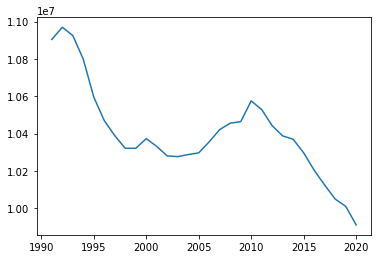

<function matplotlib.pyplot.show(close=None, block=None)>

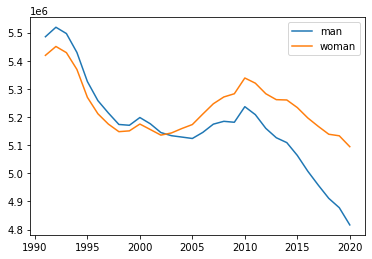

In [86]:
#그래프 따로보기
import matplotlib.pyplot as plt

gu = input('조회할 구 이름을 입력하세요')

df3 = df2[df2['자치구'] == gu]
plt.plot(df3['년도'],df3['총인구'])
plt.show()

plt.plot(df3['년도'],df3['총인구(남)'], label = 'man')
plt.plot(df3['년도'],df3['총인구(여)'], label ='woman')# plt.plot(x축, y축)
plt.legend()
plt.show

No handles with labels found to put in legend.


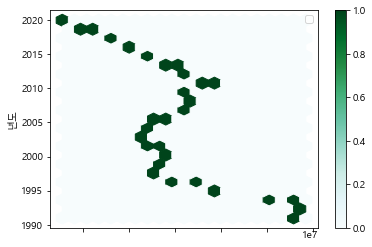

In [97]:
#산점도 그래프 그리기
import matplotlib.font_manager as fm

font_path = "C:/Windows/Fonts/malgun.ttf" 
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)



df3.plot(kind ='hexbin', x = '총인구', y = '년도', label = 'total_population'
        , gridsize = 20)
plt.legend()
plt.show()
# hexbin 산점도 그래프

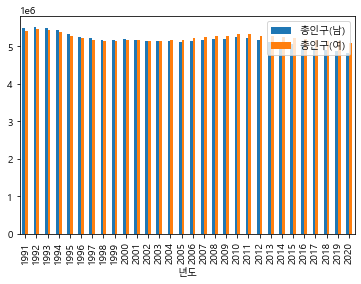

In [96]:
#bar그래프 그리기
df3.plot(kind ='bar', x = '년도', y = ['총인구(남)','총인구(여)'])
plt.legend()
plt.show()